In [ ]:
pip install scikit-learn==1.2.2

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Combined.csv')
df.head(),df.info(),df.describe(),len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8641 entries, 0 to 8640
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Source       8641 non-null   object
 1   Destination  8640 non-null   object
 2   Protocol     8640 non-null   object
 3   Length       8640 non-null   object
 4   Tcp_Flags    6202 non-null   object
 5   Label        8640 non-null   object
dtypes: object(6)
memory usage: 405.2+ KB


(           Source      Destination Protocol Length Tcp_Flags   Label
 0  192.168.29.109  255.255.255.255       17    305       NaN  Normal
 1    192.168.29.9   192.168.29.109        6   1254         S     DoS
 2    192.168.29.9   192.168.29.109        6   1254         S     DoS
 3    192.168.29.9   192.168.29.109        6   1254         S     DoS
 4    192.168.29.9   192.168.29.109        6   1254         S     DoS,
 None,
               Source     Destination Protocol Length Tcp_Flags   Label
 count           8641            8640     8640   8640      6202    8640
 unique             4               4        4     63        11       4
 top     192.168.29.9  192.168.29.109        6   1254         S  Normal
 freq            6045            6045     6220   3302      4636    4003,
 8641)

In [ ]:
# Convert 'Length' to numeric, setting errors='coerce' will convert non-convertible values to NaN
df['Length'] = pd.to_numeric(df['Length'], errors='coerce')

# Check the conversion and display any remaining missing values
df.info(), df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8641 entries, 0 to 8640
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Source       8641 non-null   object 
 1   Destination  8640 non-null   object 
 2   Protocol     8640 non-null   object 
 3   Length       8638 non-null   float64
 4   Tcp_Flags    6202 non-null   object 
 5   Label        8640 non-null   object 
dtypes: float64(1), object(5)
memory usage: 405.2+ KB


(None,
 Source            0
 Destination       1
 Protocol          1
 Length            3
 Tcp_Flags      2439
 Label             1
 dtype: int64)

In [ ]:
print(df['Destination'].shape)
print(df['Protocol'].shape)
print(df['Tcp_Flags'].shape)
print(df['Label'].shape)


(8641,)
(8641,)
(8641,)
(8641,)


In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the imputer for mode imputation
mode_imputer = SimpleImputer(strategy='most_frequent')

# List of categorical columns you mentioned
columns_to_impute = ['Destination', 'Protocol', 'Tcp_Flags', 'Label']

# Before applying the imputation, let's ensure no column is completely NaN and print data types
print(df[columns_to_impute].isnull().sum())  # Check NaN counts in each column
print(df[columns_to_impute].dtypes)          # Data types of each column

# Apply mode imputation directly without reshaping manually
for column in columns_to_impute:
    if column in df.columns:
        try:
            # Impute directly using the column data
            df[column] = mode_imputer.fit_transform(df[[column]])  # Use double brackets to maintain DataFrame slice
        except Exception as e:
            print(f"Error processing {column}: {e}")
    else:
        print(f"Column {column} does not exist in the DataFrame.")

# After imputation, let's see if there are any remaining NaN values
print("\nAfter imputation:")
print(df[columns_to_impute].isnull().sum())


Destination       1
Protocol          1
Tcp_Flags      2439
Label             1
dtype: int64
Destination    object
Protocol       object
Tcp_Flags      object
Label          object
dtype: object
Error processing Destination: 2
Error processing Protocol: 2
Error processing Tcp_Flags: 2
Error processing Label: 2

After imputation:
Destination       1
Protocol          1
Tcp_Flags      2439
Label             1
dtype: int64


In [ ]:
# Display a summary of the dataset to review changes
print(df.describe(include='all'))
print(df.info())


              Source     Destination Protocol       Length Tcp_Flags   Label
count           8641            8640     8640  8638.000000      6202    8640
unique             4               4        4          NaN        11       4
top     192.168.29.9  192.168.29.109        6          NaN         S  Normal
freq            6045            6045     6220          NaN      4636    4003
mean             NaN             NaN      NaN   523.575480       NaN     NaN
std              NaN             NaN      NaN   575.878568       NaN     NaN
min              NaN             NaN      NaN    42.000000       NaN     NaN
25%              NaN             NaN      NaN    60.000000       NaN     NaN
50%              NaN             NaN      NaN    70.000000       NaN     NaN
75%              NaN             NaN      NaN  1254.000000       NaN     NaN
max              NaN             NaN      NaN  1254.000000       NaN     NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8641 entries, 0 to 8640
Da

In [ ]:
df.isnull().sum()

Source            0
Destination       1
Protocol          1
Length            3
Tcp_Flags      2439
Label             1
dtype: int64

In [ ]:
# Check if entire columns are NaN and print column names
print("Columns entirely NaN:", df.columns[df.isnull().all()])

# Fill completely NaN columns with a placeholder if necessary
df['Tcp_Flags'].fillna('Unknown', inplace=True)

# Re-check other columns where mode imputation might have failed
columns_to_recheck = ['Destination', 'Protocol', 'Label']
for column in columns_to_recheck:
    if df[column].isnull().any():
        # Re-impute or fill with a placeholder
        df[column].fillna('Unknown', inplace=True)

# Final check on null values
print(df.isnull().sum())


Columns entirely NaN: Index([], dtype='object')
Source         0
Destination    0
Protocol       0
Length         3
Tcp_Flags      0
Label          0
dtype: int64


In [ ]:
# Force convert 'Length' to numeric, coercing errors to NaN
df['Length'] = pd.to_numeric(df['Length'], errors='coerce')

# Re-check if there are still NaN values
print("NaN counts after conversion:", df['Length'].isnull().sum())

# If NaN values exist, compute and fill with the median of the column
if df['Length'].isnull().any():
    median_value = df['Length'].median()
    df['Length'].fillna(median_value, inplace=True)

# Final check for 'Length'
print("Final NaN check for 'Length':", df['Length'].isnull().sum())


NaN counts after conversion: 3
Final NaN check for 'Length': 0


In [ ]:
df.isnull().sum()

Source         0
Destination    0
Protocol       0
Length         0
Tcp_Flags      0
Label          0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize the OneHotEncoder
# Set 'sparse_output=False' if you want a dense numpy array instead of a sparse matrix
encoder = OneHotEncoder(sparse_output=False)

# List of categorical columns
categorical_columns = ['Source', 'Destination', 'Protocol', 'Tcp_Flags']

# Apply OneHotEncoding
encoded_data = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame from the encoded data
encoded_data = pd.DataFrame(encoded_data)

# Use the new method to get feature names
encoded_data.columns = encoder.get_feature_names_out(categorical_columns)

# If you had previous columns that are not categorical and need to be included:
remaining_columns = df.drop(columns=categorical_columns)
df_encoded = pd.concat([remaining_columns, encoded_data], axis=1)

print(df_encoded.head())


   Length   Label  Source_  Source_192.168.29.109  Source_192.168.29.9  \
0   305.0  Normal       0.0                    1.0                  0.0   
1  1254.0     DoS       0.0                    0.0                  1.0   
2  1254.0     DoS       0.0                    0.0                  1.0   
3  1254.0     DoS       0.0                    0.0                  1.0   
4  1254.0     DoS       0.0                    0.0                  1.0   

   Source_Source  Destination_192.168.29.109  Destination_192.168.29.9  \
0            0.0                         0.0                       0.0   
1            0.0                         1.0                       0.0   
2            0.0                         1.0                       0.0   
3            0.0                         1.0                       0.0   
4            0.0                         1.0                       0.0   

   Destination_255.255.255.255  Destination_Destination  ...  Tcp_Flags_FPU  \
0                        

In [ ]:
from sklearn.model_selection import train_test_split

# Separating the features and the target variable
X = df_encoded.drop('Label', axis=1)
y = df_encoded['Label']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verifying the sizes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6048, 27), (2593, 27), (6048,), (2593,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Random Forest ",accuracy)


Random Forest  0.9996143463170073


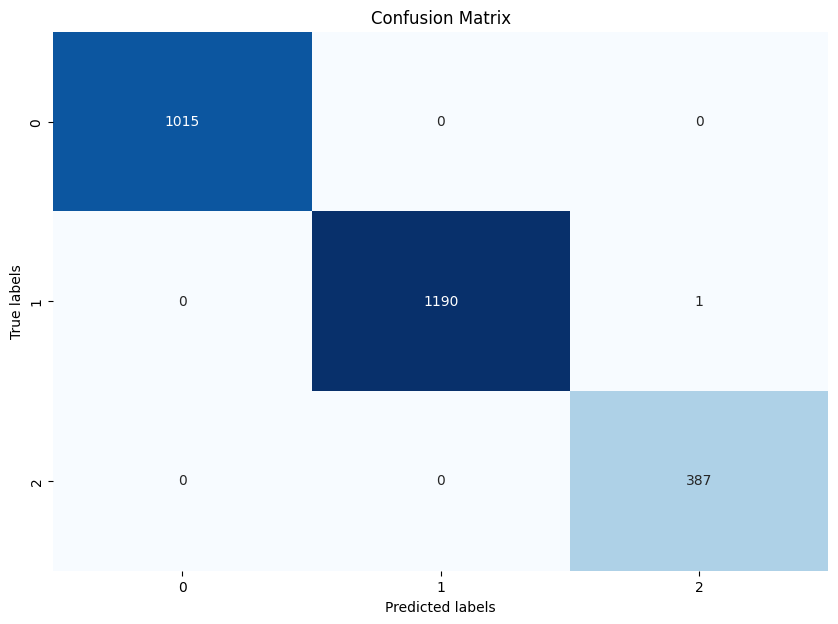

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is your true labels and y_pred are the predictions
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))  # Set the figure size
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


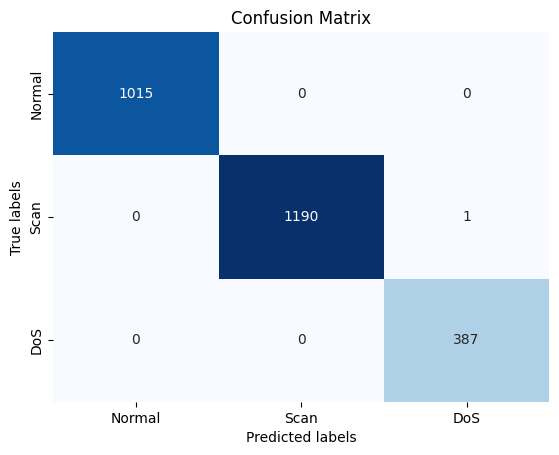

In [ ]:
# Assuming you have class names
class_names = ['Normal', 'Scan', 'DoS']  # Adjust these to your actual class names

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from joblib import dump, load

# Assuming 'classifier' is your trained model
dump(rf_classifier, 'model.joblib')


['model.joblib']

In [ ]:
# Import other classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Initialize the models
knn_classifier = KNeighborsClassifier(n_neighbors=5)
svm_classifier = SVC(kernel='linear')

# Train each model
knn_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

# Predict using each model
y_pred_knn = knn_classifier.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy for each model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print the results
print("KNN Accuracy:", accuracy_knn)
print("SVM Accuracy:", accuracy_svm)

# You can repeat the steps for generating confusion matrices and saving models for each classifier.


KNN Accuracy: 0.9973004242190513
SVM Accuracy: 0.9996143463170073


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


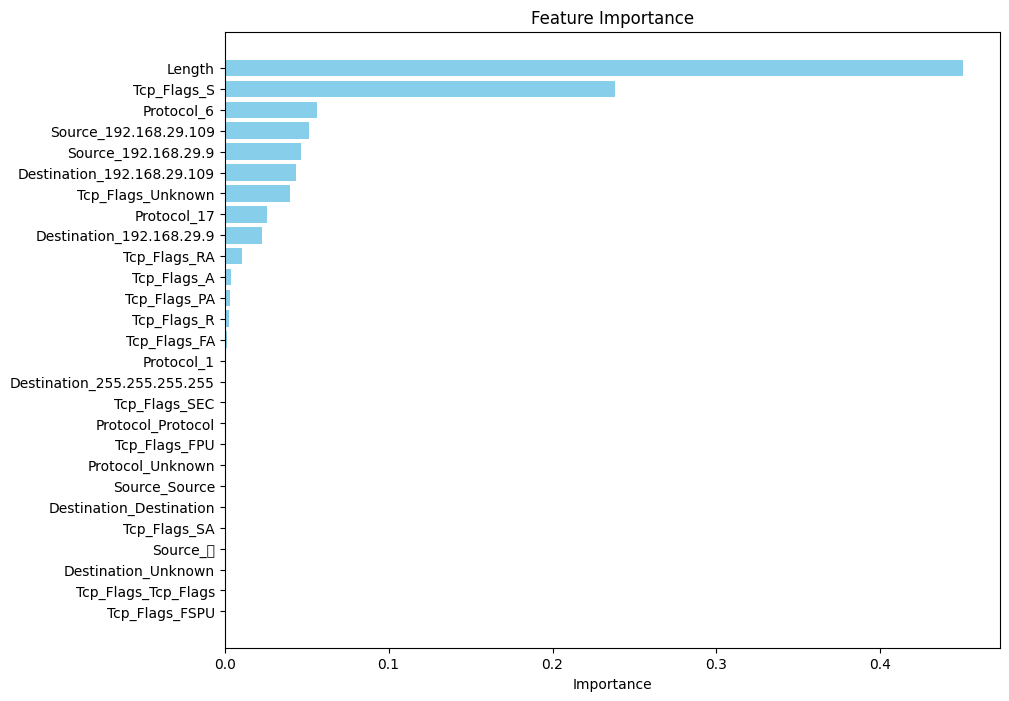

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to visualize them
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()
